In [11]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [12]:
# Liste der Variablen ausgeben
%whos       

No variables match your requested type.


In [13]:
%matplotlib notebook

# Laden der verwendeten Bibliotheken
from PIL import Image
import   numpy  as np               
import   scipy 
import   matplotlib                 # https://matplotlib.org/3.1.1/tutorials/index.html
import   matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html
import   sklearn 
import   skimage
from     skimage import data
import   time
from     scipy import signal

In [14]:
# Bild laden mit PIL
img = Image.open("shaft.bmp")
#img = Image.open("circle.bmp")
#img = Image.open("boat512.bmp")
#img = Image.open("tasse1.bmp")

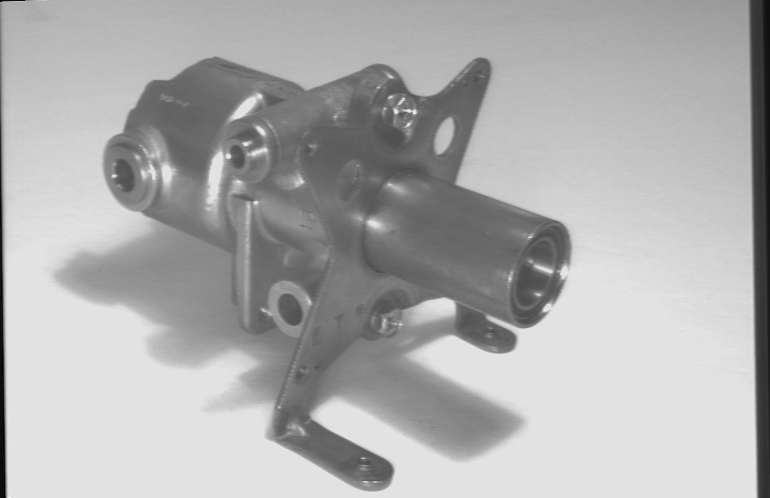

In [15]:
# PIL-Image darstellen
img

In [16]:
# Informationen über PIL-Image
print('format =', img.format)
print('info   =', img.info)
print()
print('size   =', img.size,)
print('mode   =', img.mode)  # 'L' = 8-bit-unsigned

format = BMP
info   = {'dpi': (72, 72), 'compression': 0}

size   = (770, 498)
mode   = L


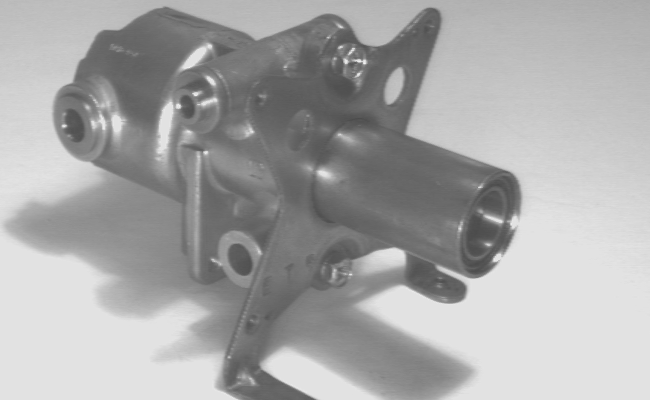

In [17]:
# Beispiel:  Bildausschnitt erzeugen mit PIL-Bild
region = img.crop((50, 50, 700, 450))  # oben links - unten rechts
region

# numpy : Vektoren, Arrays, lineare Algebra und vieles mehr ...
Die aktuelle Dokumentation findet man unter:
https://numpy.org/doc/1.18/

Der Zugriff auf einzelne Bildmatrix-Elemente ist unter numpy günstiger. 
Daher nun der Wechsel von PIL-Images zu numpy-Arrays.

In [18]:
print('Installierte Numpy-Version = ', np.__version__)

Installierte Numpy-Version =  1.18.1


In [19]:
# PIL-Image in ein numpy-Array umwandeln
img2 = np.array(region)
img2

array([[187, 186, 186, ..., 169, 169, 169],
       [186, 188, 188, ..., 169, 169, 170],
       [186, 187, 187, ..., 168, 168, 170],
       ...,
       [226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226],
       [226, 226, 226, ..., 226, 226, 226]], dtype=uint8)

In [20]:
# Informationen über numpy-Array
print('shape =', img2.shape)
print('type  =', img2.dtype)
print('min   =', img2.min())
print('max   =', img2.max())

shape = (400, 650)
type  = uint8
min   = 75
max   = 242


<IPython.core.display.Javascript object>


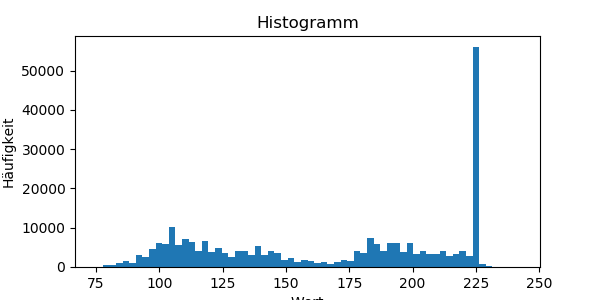

Text(0.5, 1.0, 'Histogramm')

In [21]:
# Histogramm des Bildes anzeigen
plt.figure(figsize = (6,3))

plt.hist(img2.flatten(), bins=64)

plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm')

In [22]:
# in höheren Datentyp umwandeln  (uint8 --> int), damit Ergebnisse nicht beschnitten werden !

srcpic  = np.copy(img2)      # eine echte Kopie anlegen
srcpic  = srcpic.astype(int) # und in den Datentyp int umwandeln

print('srcpic.dtype     = ', srcpic.dtype)

srcpic.dtype     =  int32


In [62]:
# Selbstgeschriebene Medianfunktion
# ------------------------------------------------------
# Verwendet wird die Faltungsmaske (4-er-Nachbarschaft):
#      -1
#   -1 +5 -1
#      -1
#
# In : int32-Bild
# Out: int32-Bild

def MyMedian(Quellbild, Maskengroeße_x, Maskengroeße_y):
    # Zielbilder anlegen
    Zielbild = np.copy(Quellbild)
    
    # Pruefen ob Maske ungerade
    if(Maskengroeße_x % 2 == 0):
        Maskengroeße_x += 1
        
    if(Maskengroeße_y % 2 == 0):
        Maskengroeße_y += 1

    print('Maskengroeße_x    = ', Maskengroeße_x)
    print('Maskengroeße_y    = ', Maskengroeße_y)
    
    MedianPos =  int((Maskengroeße_x * Maskengroeße_y + 1) / 2)
    
    # Größe des Quellbildes bestimmen
    ysize = Quellbild.shape[0]
    xsize = Quellbild.shape[1]
    
    print('Bildgröße =', xsize, '/',  ysize)
    
    Quellbild = Quellbild.astype(int)
    Zielbild = Zielbild.astype(int)
    
    varBins = Maskengroeße_x * Maskengroeße_y

    x_maxrange = int(Maskengroeße_x/2)
    y_maxrange = int(Maskengroeße_y/2)

    print('Maxrange =', x_maxrange, '/',  y_maxrange)
    
    Median = 0
    result_t = []
    Count = 0
    
    for i in range(1, ysize - 1):
        for j in range(1, xsize - 1):
            for y in range(-y_maxrange, y_maxrange + 1, 1):
                for x in range(-x_maxrange, x_maxrange + 1, 1):
                    # Randbehandlung
                    if((i + y < 0) or (i + y > ysize) or (j + x < 0) or (j + x > xsize)):
                        Count += 1
                        continue
                    result_t += [Quellbild[i + y][j + x]]
            # Median berechnen
            # Zielbild[y][x] = Median
            result_t = []
    print(result_t)
    print(Count)
    return Zielbild

In [63]:


#start = time.time()

# Medianoperator aufrufen
mw_img = MyMedian(srcpic, 2, 2)

#ende   = time.time()
#print('Runtime   = {:5.3f}s'.format(ende-start))
print('hello')
print('dtype     = ', mw_img.dtype)


Maskengroeße_x    =  3
Maskengroeße_y    =  3
Bildgröße = 650 / 400
Maxrange = 1 / 1
[]
0
hello
dtype     =  int32


In [7]:
 def count_elements(seq) -> dict:
    n = len(seq) 
 
  
    if n % 2 == 0: 
        median1 = seq[n//2] 
        median2 = seq[n//2 - 1] 
        median = (median1 + median2)/2
    else: 
        median = seq[n//2] 
    print("Median is: " + str(median))
    return median


In [8]:
 a = [7, 1, 4, 4, 7, 1, 3, 4, 5]
    
counted = count_elements(a)
print(counted)

NameError: name 'statistics' is not defined

<IPython.core.display.Javascript object>


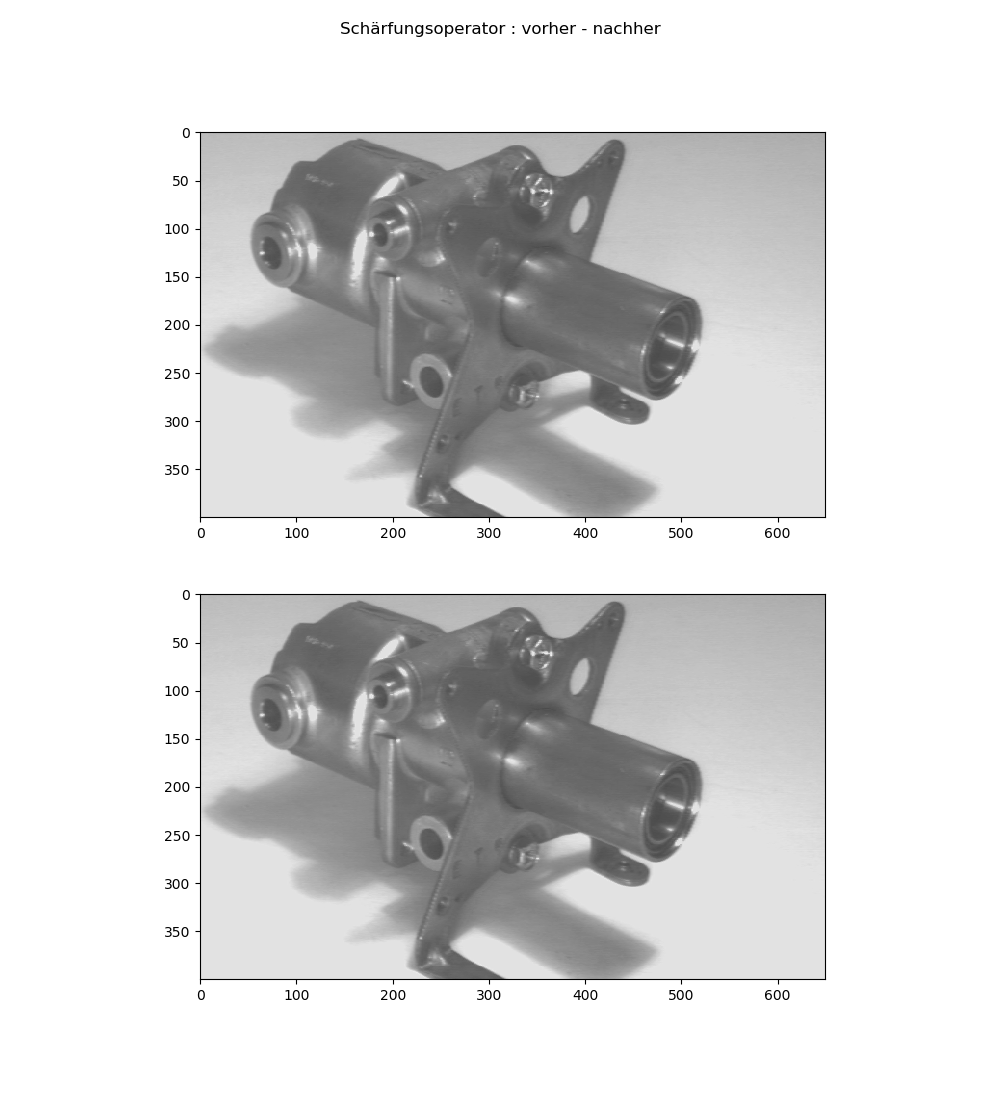

min/max = 75 242
shape   = (400, 650)
dtype   = int32


In [16]:
pic = mw_img;


plt.figure(figsize = (10,11))

plt.subplot(211)
plt.imshow(srcpic, cmap='gray', vmin=0, vmax=255)
plt.subplot(212)
plt.imshow(pic, cmap='gray', vmin=0, vmax=255)
plt.suptitle('Schärfungsoperator : vorher - nachher')
plt.show()

# Informationen zum Bild
print('min/max =', pic.min(), pic.max())
print('shape   =', pic.shape)
print('dtype   =', pic.dtype)

In [17]:
# Zum Vergleich: Laufzeit bei Nutzung der scipy-2d-Faltungsoperation

#mask = np.array([[0, -1, 0],
    #             [-1, 5, -1],
         #        [0, -1, 0]])

#start = time.time()
#shpic = signal.convolve2d(srcpic, mask)
#ende  = time.time()
#print('Runtime   = {:5.3f}s'.format(ende-start))

In [18]:
#pic = shpic;
#plt.figure(figsize = (10,5))
#plt.imshow(pic, cmap='gray', vmin=0, vmax=255)

In [19]:
# Anm.:  ca. 50-70 mal schneller

In [20]:
# Liste der Variablen ausgeben
%whos    

Variable     Type            Data/Info
--------------------------------------
Image        module          <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
MyMedian     function        <function MyMedian at 0x000001BD3B967828>
data         module          <module 'skimage.data' fr<...>mage\\data\\__init__.py'>
img          BmpImageFile    <PIL.BmpImagePlugin.BmpIm<...>770x498 at 0x1BD3A71C888>
img2         ndarray         400x650: 260000 elems, type `uint8`, 260000 bytes (253.90625 kb)
matplotlib   module          <module 'matplotlib' from<...>matplotlib\\__init__.py'>
mw_img       ndarray         400x650: 260000 elems, type `int32`, 1040000 bytes (1015.625 kb)
np           module          <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pic          ndarray         400x650: 260000 elems, type `int32`, 1040000 bytes (1015.625 kb)
plt          module          <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
region       Image           <PIL.Image.Image image mo<...>